In [ ]:
pip install contextily && geopandas &&  topojson && py7zr && openpyxl && tqdm && s3fs && pandas && fiona && shapely && pyproj && rtree

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
'geopandas' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [21]:
pip install PyYAML xlrd && git+https://github.com/inseefrlab/cartiflette && git+https://github.com/inseeFrLab/cartiflette.git && openmeteo-requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
'git+https:' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [22]:
pip install requests-cache retry-requests 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   --- ------------------------------------ 1.3/16.2 MB 7.5 MB/s eta 0:00:02
   ------ --------------------------------- 2.6/16.2 MB 6.6 MB/s eta 0:00:03
   --------- ------------------------------ 3.9/16.2 MB 6.2 MB/s eta 0:00:02
   ------------- -------------------------- 5.5/16.2 MB 6.6 MB/s eta 0:00:02
   ---------------- ----------------------- 6.8/16.2 MB 6.7 MB/s eta 0:00:02
   --------------------- ------------------ 8.7/16.2 MB 7.0 MB/s eta 0:00:02
   ------------------------- -------------- 10.5/16.2 MB 7.3 MB/s eta 0:00:01
   ----------------------------- ---------- 11.8/16.2 MB 7.2 MB/s eta 0:00:01
   -------------------------------- ------- 13.1/16.2 MB 7.0 MB/s eta 0:00:01
   ----------------------------------- ---- 14.4/16.2 MB 6.9 MB/s eta 0:00:01
   -------------------------------------- - 15.7/16.2 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 6.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
pip install cartiflette

  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 4.2.2
    Uninstalling platformdirs-4.2.2:
      Successfully uninstalled platformdirs-4.2.2
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [64]:
# Récupératoin des données 

from cartiflette import carti_download

france = carti_download(
    values=["France"],
    crs=4326,
    borders="REGION",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)


In [35]:
france.head()

,INSEE_REG,PAYS,LIBELLE_REGION,POPULATION,SOURCE,geometry
0,1,France,Guadeloupe,384239,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-61.62648 16.27275, -61.62658 ..."
1,3,France,Guyane,281678,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-51.6408 4.21282, -51.64144 4...."
2,2,France,Martinique,364508,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-60.93246 14.7306, -60.9326 14..."
3,6,France,Mayotte,256518,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((45.08357 -12.96139, 45.08547 -..."
4,84,France,Auvergne-Rhône-Alpes,8042936,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((6.06386 46.41639, 6.06267 46.4168, 6..."


In [8]:
print(france.crs)

EPSG:4326


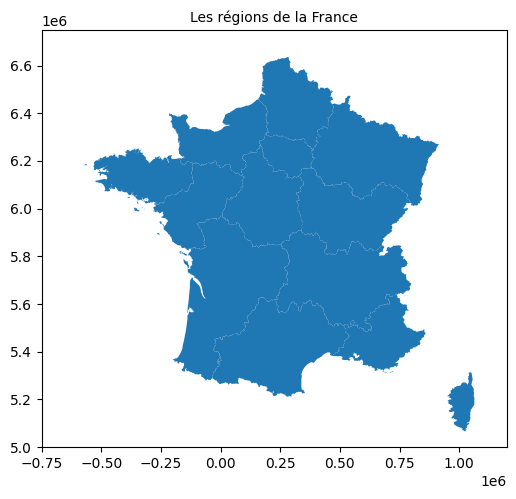

In [36]:
#REPRESENTATION 

if france.crs.to_string() != "EPSG:3857":
    france = france.to_crs(epsg=3857)
#Les  limites de la carte
xmin, xmax = -0.75e6, 1.2e6  # Convertir les limites en mètres (EPSG:3857)
ymin, ymax = 5e6, 6.75e6

#Ploting
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
france.plot(ax=ax)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
plt.title("Les régions de la France", fontsize=10)
plt.show()


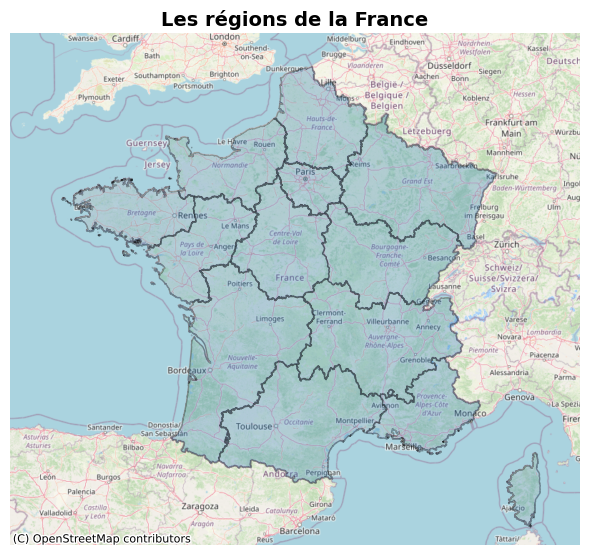

In [37]:
# Ajout d'un fond de carte pour un meilleur contexte géographique
fig, ax = plt.subplots(1, 1, figsize=(6, 6)) 
france.plot(ax=ax, edgecolor='black', linewidth=1, alpha=0.3)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# 
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=france.crs)
#
plt.title("Les régions de la France", fontsize=14, fontweight='bold')
ax.axis('off') 

plt.tight_layout() 
plt.show()


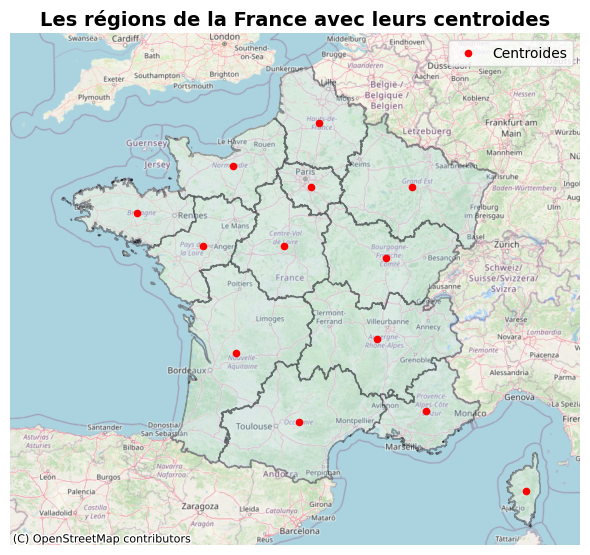

In [39]:
#Représentation des centroides 
france['centroid'] = france.geometry.centroid
france['longitude'] = france.centroid.x
france['latitude'] = france.centroid.y
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
france.plot(ax=ax, edgecolor='black', linewidth=1, alpha=0.3, color='lightblue')
ax.scatter(france['longitude'], france['latitude'], color='red', s=20, label='Centroides')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=france.crs)
plt.title("Les régions de la France avec leurs centroides", fontsize=14, fontweight='bold')
ax.axis('off')
ax.legend()
plt.tight_layout()
plt.show()

In [40]:
# Calcul des longitudes et latitudes 
france = france.to_crs(epsg=4326)
france['longitude'] = france.geometry.centroid.x
france['latitude'] = france.geometry.centroid.y
print(france[['LIBELLE_REGION', 'longitude', 'latitude']])


                LIBELLE_REGION  longitude   latitude
0                   Guadeloupe -61.539833  16.197646
1                       Guyane -53.239940   3.915167
2                   Martinique -61.019379  14.654871
3                      Mayotte  45.147435 -12.820617
4         Auvergne-Rhône-Alpes   4.536119  45.514642
5                    Occitanie   2.143923  43.702500
6                     Bretagne  -2.841463  48.177549
7           Nouvelle-Aquitaine   0.212719  45.206040
8                    Normandie   0.110932  49.120067
9   Provence-Alpes-Côte d'Azur   6.061005  43.958789
10            Pays de la Loire  -0.816786  47.478104
11                   Grand Est   5.613112  48.688977
12     Bourgogne-Franche-Comté   4.806857  47.234282
13               Île-de-France   2.503401  48.709316
14         Centre-Val de Loire   1.684391  47.484775
15             Hauts-de-France   2.771303  49.969594
16                       Corse   9.106152  42.151511
17                  La Réunion  55.532509 -21.

C:\Users\steph\AppData\Local\Temp\ipykernel_5880\2487130668.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  france['longitude'] = france.geometry.centroid.x
C:\Users\steph\AppData\Local\Temp\ipykernel_5880\2487130668.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  france['latitude'] = france.geometry.centroid.y


In [41]:
france.head()

,INSEE_REG,PAYS,LIBELLE_REGION,POPULATION,SOURCE,geometry,centroid,longitude,latitude
0,1,France,Guadeloupe,384239,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-61.62648 16.27275, -61.62658 ...",POINT (-6850582.542 1827642.261),-61.539833,16.197646
1,3,France,Guyane,281678,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-51.6408 4.21282, -51.64144 4....",POINT (-5926644.81 436331.726),-53.239940,3.915167
2,2,France,Martinique,364508,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-60.93246 14.7306, -60.9326 14...",POINT (-6792650.367 1649468.223),-61.019379,14.654871
3,6,France,Mayotte,256518,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((45.08357 -12.96139, 45.08547 -...",POINT (5025789.843 -1439250.269),45.147435,-12.820617
4,84,France,Auvergne-Rhône-Alpes,8042936,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((6.06386 46.41639, 6.06267 46.4168, 6...",POINT (504837.95 5704315.458),4.536119,45.514642


In [43]:
# Création de la liste de triplets (région, longitude, latitude)
region_centroides = []
for index, row in france.iterrows():
    region = row['LIBELLE_REGION']  # Nom de la région
    longitude = row['longitude']  # Longitude du centroïde
    latitude = row['latitude']    # Latitude du centroïde
    region_centroides.append((region, longitude, latitude)) # Ajout du triplet à la liste
region_centroides

[('Guadeloupe', -61.539833041077834, 16.1976458265529),
 ('Guyane', -53.23993971851178, 3.915166862499844),
 ('Martinique', -61.01937874077369, 14.654870858984367),
 ('Mayotte', 45.14743542382147, -12.820616875536656),
 ('Auvergne-Rhône-Alpes', 4.536118586333609, 45.51464202656836),
 ('Occitanie', 2.1439228339376544, 43.70250024549978),
 ('Bretagne', -2.8414626764658864, 48.17754922086024),
 ('Nouvelle-Aquitaine', 0.21271860548694319, 45.20603953960883),
 ('Normandie', 0.11093239896467046, 49.12006667987378),
 ("Provence-Alpes-Côte d'Azur", 6.0610045225522295, 43.95878857291766),
 ('Pays de la Loire', -0.8167859826189401, 47.478103544872866),
 ('Grand Est', 5.613112231600144, 48.68897740160864),
 ('Bourgogne-Franche-Comté', 4.80685691530116, 47.23428194519943),
 ('Île-de-France', 2.50340139255276, 48.709315501090735),
 ('Centre-Val de Loire', 1.684391322381998, 47.48477508284456),
 ('Hauts-de-France', 2.7713028658475456, 49.96959396126242),
 ('Corse', 9.106151755156157, 42.151511375620

In [88]:

import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
from openmeteo_requests import Client


# Création d'une session avec cache
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = Client(session=retry_session)

# Création d'un dictionnaire pour stocker les DataFrames
region_dataframes = {}

# Boucle pour récupérer les données pour chaque région
for region, longitude, latitude in region_centroides:
    try:
        url = "https://air-quality-api.open-meteo.com/v1/air-quality"
        params = {
            "latitude": latitude,
            "longitude": longitude,
            "current": ["european_aqi", "us_aqi"],
            "hourly": ["pm10", "pm2_5", "carbon_monoxide", "carbon_dioxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone"],
            "start_date": "2023-01-01",
            "end_date": "2024-01-01"
        }

        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]  # Première réponse, si plusieurs localisations

        # Récupération des données horaires
        hourly = response.Hourly()
        hourly_data = {
            "date": pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            ),
            "region": [region] * len(pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            )),
            "pm10": hourly.Variables(0).ValuesAsNumpy(),
            "pm2_5": hourly.Variables(1).ValuesAsNumpy(),
            "carbon_monoxide": hourly.Variables(2).ValuesAsNumpy(),
            "carbon_dioxide": hourly.Variables(3).ValuesAsNumpy(),
            "nitrogen_dioxide": hourly.Variables(4).ValuesAsNumpy(),
            "sulphur_dioxide": hourly.Variables(5).ValuesAsNumpy(),
            "ozone": hourly.Variables(6).ValuesAsNumpy()
        }

        # Stockage du DataFrame dans le dictionnaire
        region_dataframes[region] = pd.DataFrame(data=hourly_data)

    except Exception as e:
        print(f"Erreur lors de la récupération des données pour {region}: {e}")

# Concaténation tous les DataFrames
combined_dataframe_air = pd.concat(region_dataframes.values(), ignore_index=True)
combined_dataframe_air['date'] = pd.to_datetime(combined_dataframe_air['date'])
# Création d'une nouvelle colonne 'day' contenant uniquement la date (sans l'heure)
#combined_dataframe_air['day'] = combined_dataframe_air['date'].dt.date
combined_dataframe_air.insert(1,"day",combined_dataframe_air["date"].dt.date)



In [89]:
combined_dataframe_air

,date,day,region,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone
0,2023-01-01 00:00:00+00:00,2023-01-01,Guadeloupe,20.500000,11.3,89.0,NaN,3.70,0.30,62.0
1,2023-01-01 01:00:00+00:00,2023-01-01,Guadeloupe,21.700001,11.9,89.0,NaN,3.45,0.30,62.0
2,2023-01-01 02:00:00+00:00,2023-01-01,Guadeloupe,21.799999,12.0,88.0,NaN,3.15,0.25,63.0
3,2023-01-01 03:00:00+00:00,2023-01-01,Guadeloupe,20.700001,11.4,88.0,NaN,2.60,0.25,64.0
4,2023-01-01 04:00:00+00:00,2023-01-01,Guadeloupe,19.400000,10.7,88.0,NaN,2.10,0.25,64.0
...,...,...,...,...,...,...,...,...,...,...
158107,2024-01-01 19:00:00+00:00,2024-01-01,La Réunion,6.000000,3.5,101.0,NaN,3.10,2.00,29.0
158108,2024-01-01 20:00:00+00:00,2024-01-01,La Réunion,6.100000,3.5,101.0,NaN,2.90,1.90,29.0
158109,2024-01-01 21:00:00+00:00,2024-01-01,La Réunion,6.600000,3.8,100.0,NaN,2.60,1.80,29.0
158110,2024-01-01 22:00:00+00:00,2024-01-01,La Réunion,6.800000,4.0,99.0,NaN,2.10,1.60,29.0


In [90]:
# Création d'une session avec cache
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = Client(session=retry_session)

# Création d'un dictionnaire pour stocker les DataFrames
region_dataframes = {}

# Boucle pour récupérer les données pour chaque région
for region, longitude, latitude in region_centroides:
    try:
        url = "https://archive-api.open-meteo.com/v1/archive"
        params = {
            "latitude": latitude,
            "longitude": longitude,
            "hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "wind_speed_10m", "soil_temperature_0_to_7cm", "soil_moisture_0_to_7cm"],
            "start_date": "2023-01-01",
            "end_date": "2024-01-01"
        }

        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]  # Première réponse, si plusieurs localisations

        # Récupération des données horaires
        hourly = response.Hourly()
        hourly_data = {
            "date": pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            ),
            "region": [region] * len(pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            )),
            "temperature_2m": hourly.Variables(0).ValuesAsNumpy(),
            "relative_humidity_2m": hourly.Variables(1).ValuesAsNumpy(),
            "precipitation": hourly.Variables(2).ValuesAsNumpy(),
            "surface_pressure": hourly.Variables(3).ValuesAsNumpy(),
            "wind_speed_10m": hourly.Variables(4).ValuesAsNumpy(),
            "soil_temperature_0_to_7cm": hourly.Variables(5).ValuesAsNumpy(),
            "soil_moisture_0_to_7cm": hourly.Variables(6).ValuesAsNumpy(),
            "longitude" : longitude,
            "latitude" : latitude
        }

        # Stockage du DataFrame dans le dictionnaire
        region_dataframes[region] = pd.DataFrame(data=hourly_data)

    except Exception as e:
        print(f"Erreur lors de la récupération des données pour {region}: {e}")
        
    # Concaténation tous les DataFrames
combined_dataframe_climat = pd.concat(region_dataframes.values(), ignore_index=True)
combined_dataframe_climat = combined_dataframe_climat.drop(columns=["region","date"])

In [91]:
df=pd.concat([combined_dataframe_air,combined_dataframe_climat],axis=1)
df

,date,day,region,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,precipitation,surface_pressure,wind_speed_10m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,longitude,latitude
0,2023-01-01 00:00:00+00:00,2023-01-01,Guadeloupe,20.500000,11.3,89.0,NaN,3.70,0.30,62.0,23.770000,84.863304,0.0,1017.400024,9.422101,24.020000,0.501,-61.539833,16.197646
1,2023-01-01 01:00:00+00:00,2023-01-01,Guadeloupe,21.700001,11.9,89.0,NaN,3.45,0.30,62.0,23.719999,85.643173,0.0,1017.599976,9.885262,23.670000,0.499,-61.539833,16.197646
2,2023-01-01 02:00:00+00:00,2023-01-01,Guadeloupe,21.799999,12.0,88.0,NaN,3.15,0.25,63.0,23.520000,86.947586,0.0,1017.700012,9.720000,23.420000,0.498,-61.539833,16.197646
3,2023-01-01 03:00:00+00:00,2023-01-01,Guadeloupe,20.700001,11.4,88.0,NaN,2.60,0.25,64.0,23.270000,88.269188,0.0,1017.400024,7.559999,23.219999,0.497,-61.539833,16.197646
4,2023-01-01 04:00:00+00:00,2023-01-01,Guadeloupe,19.400000,10.7,88.0,NaN,2.10,0.25,64.0,22.469999,94.082932,0.2,1017.299988,8.825508,23.020000,0.497,-61.539833,16.197646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158107,2024-01-01 19:00:00+00:00,2024-01-01,La Réunion,6.000000,3.5,101.0,NaN,3.10,2.00,29.0,15.841499,99.362640,0.6,825.228455,4.452954,18.391500,0.317,55.532509,-21.133203
158108,2024-01-01 20:00:00+00:00,2024-01-01,La Réunion,6.100000,3.5,101.0,NaN,2.90,1.90,29.0,15.941500,97.473885,0.4,824.718506,5.014219,18.241501,0.314,55.532509,-21.133203
158109,2024-01-01 21:00:00+00:00,2024-01-01,La Réunion,6.600000,3.8,100.0,NaN,2.60,1.80,29.0,15.391500,96.526634,0.1,823.829346,3.758510,17.941500,0.310,55.532509,-21.133203
158110,2024-01-01 22:00:00+00:00,2024-01-01,La Réunion,6.800000,4.0,99.0,NaN,2.10,1.60,29.0,15.741501,93.177734,0.0,823.708740,4.896529,17.891500,0.306,55.532509,-21.133203


In [92]:
# Agrégation par 'day' et 'region' en prenant la moyenne
df = df.groupby(['day', 'region']).mean().reset_index()

In [93]:
df.head()

,day,region,date,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,precipitation,surface_pressure,wind_speed_10m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,longitude,latitude
0,2023-01-01,Auvergne-Rhône-Alpes,2023-01-01 11:30:00+00:00,14.954166,7.858334,118.791664,NaN,3.475000,0.837500,62.250000,11.954083,71.024551,0.000000,964.791809,23.574928,10.964500,0.365333,4.536119,45.514642
1,2023-01-01,Bourgogne-Franche-Comté,2023-01-01 11:30:00+00:00,13.300000,7.737500,120.375000,NaN,3.795833,0.741667,59.541668,10.743833,77.391754,0.000000,963.939941,20.494823,9.506333,0.393667,4.806857,47.234282
2,2023-01-01,Bretagne,2023-01-01 11:30:00+00:00,9.845834,5.720833,128.666672,NaN,3.395833,0.270833,64.916664,10.547750,89.859863,0.358333,998.909729,18.512320,10.185250,0.420542,-2.841463,48.177549
3,2023-01-01,Centre-Val de Loire,2023-01-01 11:30:00+00:00,13.750000,7.679167,125.416664,NaN,2.837500,0.770833,52.958332,14.431666,66.970406,0.000000,1004.533508,18.958830,12.196250,0.262458,1.684391,47.484775
4,2023-01-01,Corse,2023-01-01 11:30:00+00:00,8.979167,5.345833,94.500000,NaN,2.208333,0.341667,52.833332,6.793917,73.633392,0.000000,841.699280,4.792229,3.352250,0.466958,9.106152,42.151511


In [107]:
df.shape

(6588, 19)